# Call-center data analysis

This dataset contains information from a call center, including details about calls made, such as caller ID, phone number, call type, staff ID, date, start time, handle time, total client time, abandon time, and whether the call was abandoned or not.

Objective:

The main objective of this analysis is to determine the optimal hours for making outgoing calls based on the provided data. By examining factors like call volume, handle time, and abandonment rates, we aim to identify time slots when call center operations are most efficient and customer engagement is highest.

source of data: /kaggle/input/call-center-dataset/Call-Center-Dataset.xlsx

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [3]:
data = pd.read_excel('Copy of call-center.xlsx')

In [4]:
data.head()

,id,phone_num,call_type,staff_id,date,start_time,handle_time,Total_Client_Time,Abandon_Time,abandon
0,197987909709,669672666000,Outcoming,19561043,2019-06-12,08:30:14,85,85,0,N
1,197987910507,668668849076,Outcoming,19561043,2019-06-12,08:32:53,47,47,0,N
2,197987911091,669696557000,Outcoming,19561043,2019-06-12,08:34:38,84,84,0,N
3,197987911591,669296652770,Outcoming,20158124,2019-06-12,08:36:20,54,54,0,N
4,197987911790,669264864525,Outcoming,19406986,2019-06-12,08:36:56,4,4,0,N


In [6]:
cell_format = data["start_time"].dtypes
print(cell_format)

object


In [7]:
# converting the "start_time" column to datetime format
data["start_time"] = pd.to_datetime(data["start_time"], format="%H:%M:%S")

# format after conversion
cell_format = data["start_time"].dtypes
print(cell_format)
print(data.head())

datetime64[ns]
             id     phone_num  call_type  staff_id       date  \
0  197987909709  669672666000  Outcoming  19561043 2019-06-12   
1  197987910507  668668849076  Outcoming  19561043 2019-06-12   
2  197987911091  669696557000  Outcoming  19561043 2019-06-12   
3  197987911591  669296652770  Outcoming  20158124 2019-06-12   
4  197987911790  669264864525  Outcoming  19406986 2019-06-12   

           start_time  handle_time   Total_Client_Time  Abandon_Time abandon  
0 1900-01-01 08:30:14            85                 85             0       N  
1 1900-01-01 08:32:53            47                 47             0       N  
2 1900-01-01 08:34:38            84                 84             0       N  
3 1900-01-01 08:36:20            54                 54             0       N  
4 1900-01-01 08:36:56             4                  4             0       N  


In [8]:
# group calls by start time
calls_by_hour = data.groupby(data["start_time"].dt.hour)["id"].count()

# calculation of the average number of calls in individual hours
average_calls_by_hour = calls_by_hour.mean()
print(average_calls_by_hour)

522.1


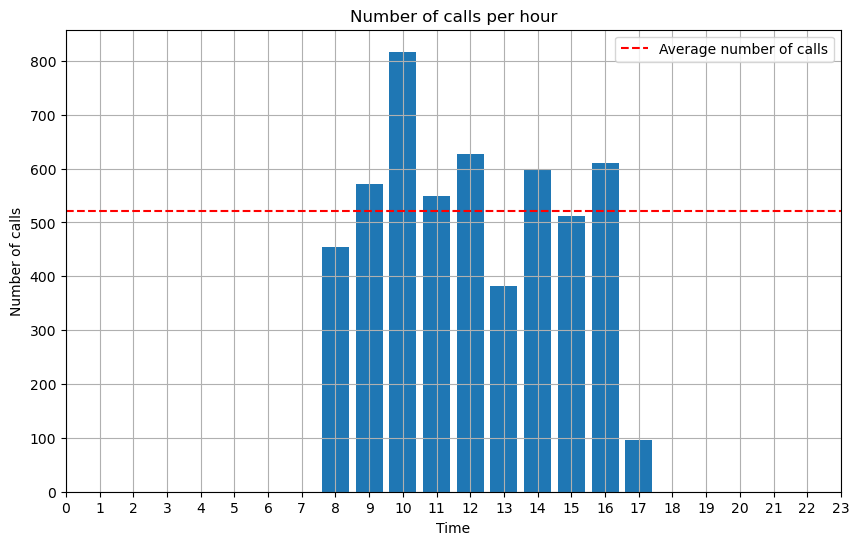

In [9]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(calls_by_hour.index, calls_by_hour.values)
plt.axhline(y=average_calls_by_hour, color='r', linestyle='--', label='Average number of calls')
plt.xlabel("Time")
plt.ylabel("Number of calls")
plt.title("Number of calls per hour")
plt.legend()
plt.xticks(range(24))
plt.grid(True)
plt.show()







In [10]:
# separation of hour
data['hour'] = data['start_time'].dt.hour

data['Outcoming_calls'] = (data['call_type'] == 'Outcoming').astype(int)
data['Incoming_calls'] = (data['call_type'] == 'Incoming').astype(int)

outcoming_calls_per_hour = data[data['Outcoming_calls'] == 1].groupby('hour')['id'].count()

# average talk time each hour
avg_handle_time_per_hour = data.groupby('hour')['Total_Client_Time'].mean()

# the hour with the highest number of calls
avg_handle_time_per_hour_outcoming = data[data['Outcoming_calls'] == 1].groupby('hour')['Total_Client_Time'].mean()

# the hour with the longest average talk time
best_hour_for_longest_outcoming_calls = avg_handle_time_per_hour_outcoming.idxmax()

# the hour with the highest number of outcoming calls
best_hour_for_outcoming_calls = outcoming_calls_per_hour.idxmax()


# results
print("Best time to make calls (most calls):", best_hour_for_outcoming_calls)
print("Best time to make calls (longest calls):", best_hour_for_longest_outcoming_calls)


Best time to make calls (most calls): 10
Best time to make calls (longest calls): 11


In [11]:
data = data[data['call_type']=='Outcoming']

In [12]:
data_8 = data.loc[data['hour']==8, 'Total_Client_Time']
data_9 = data.loc[data['hour']==9, 'Total_Client_Time']

In [13]:
by_hour = []
for i in range(8, 18):
  data_temp = data.loc[data['hour']==i, 'Total_Client_Time']
  by_hour.append(data_temp)

The ANOVA test was conducted to assess whether there are significant differences in the number of calls among different hours of the day

In [14]:
# ANOVA test 
anova_result_time = f_oneway(*by_hour)

# Results for the talk time test
if anova_result_time.pvalue < 0.05:
    print("Differences in average talk time are significant (p < 0.05)")
else:
    print("No significant differences in average talk time (p >= 0.05)")
print("p-value:", anova_result_time.pvalue)



Differences in average talk time are significant (p < 0.05)
p-value: 3.373965801757094e-15


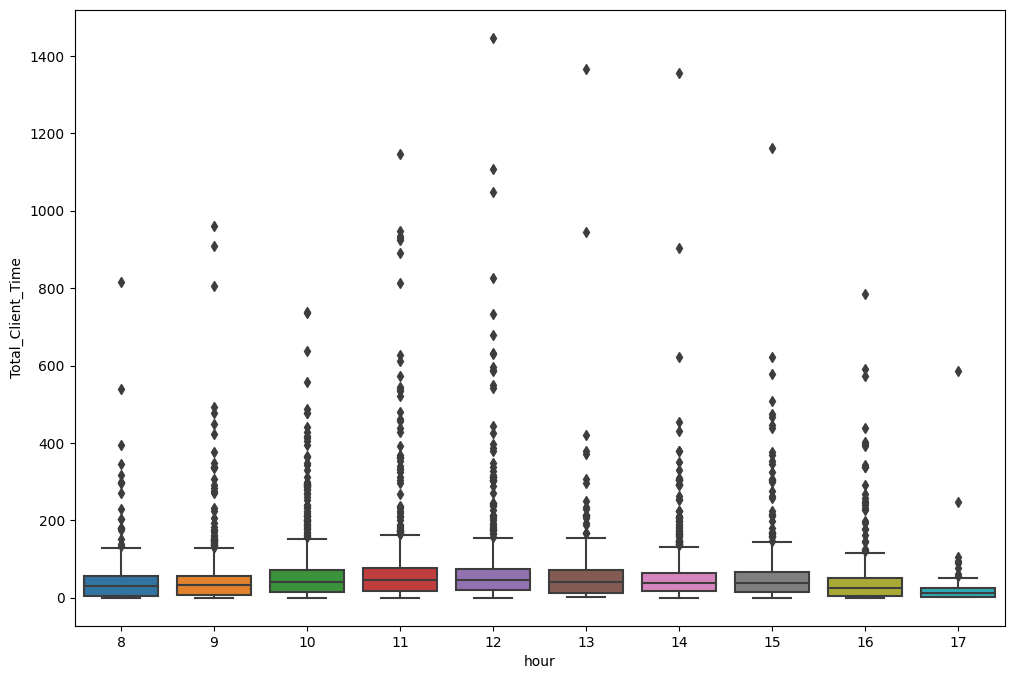

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='hour', y='Total_Client_Time')
plt.show()

In [15]:
hourly_counts = {}
for hour in range(9, 18):
    data_hourly = data[data['start_time'].dt.hour == hour]
    count = len(data_hourly)

    hourly_counts[f'hour_{hour}'] = count

In [16]:
for hour, count in hourly_counts.items():
    print(f" {hour}: {count} calls")

 hour_9: 569 calls
 hour_10: 815 calls
 hour_11: 543 calls
 hour_12: 623 calls
 hour_13: 372 calls
 hour_14: 596 calls
 hour_15: 506 calls
 hour_16: 606 calls
 hour_17: 96 calls


In [33]:
# tuckey post-hoc test
tukey_results_time = pairwise_tukeyhsd(data['Total_Client_Time'], data['hour'])
print(tukey_results_time)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     8      9   9.1668 0.8932  -10.196  28.5296  False
     8     10  19.1983 0.0261   1.1772  37.2193   True
     8     11  37.5237    0.0  17.9565  57.0909   True
     8     12  32.2795    0.0  13.2923  51.2667   True
     8     13   18.651 0.1567  -2.8646  40.1666  False
     8     14  17.3885 0.1139  -1.7789  36.5559  False
     8     15  18.3719 0.0993   -1.518  38.2617  False
     8     16  -0.9453    1.0 -20.0443  18.1536  False
     8     17   -15.43 0.9234   -49.98  19.1201  False
     9     10  10.0314  0.676  -6.7674  26.8303  False
     9     11  28.3569 0.0001   9.9091  46.8046   True
     9     12  23.1127 0.0017   5.2813  40.9441   True
     9     13   9.4842 0.9062 -11.0187  29.9871  False
     9     14   8.2217 0.9134  -9.8015  26.2448  False
     9     15    9.205 0.8714  -9.5847  27.9948  False
     9    

After conducting the ANOVA test, which indicated significant differences, a Tukey's test was performed to compare the means of different groups. These groupings help identify statistically significant differences in the Total_Client_Time among various hours, providing valuable insights into the variation in call durations between different time periods. 

The analysis results indicate that the optimal time for making calls is at 11 AM because during this time, the calls tend to have the longest durations. The second-best time is at 12 PM, as there are no statistically significant differences between 12 PM and the hours 11 AM, 10 AM, 1 PM, 2 PM, and 3 PM. On the other hand, the least favorable hours for making calls are 8 AM, 4 PM, and 5 PM.